In [32]:
!pip3 install essentia

In [33]:
!pip3 install madmom

In [34]:
!pip3 install mir_eval

The section below is all path dependent

In [35]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = 'drive/MyDrive/Bass/'

import pandas as pd
import sys
sys.path.append(root)

Mounted at /content/drive


In [36]:
import madmom

In [37]:
from essentia.standard import *
from essentia import Pool, array
import essentia.standard as es
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import pandas as pd
import os

import IPython
import pickle
from pickle import load
from scipy.signal import find_peaks
import ipywidgets as widgets
from scipy import signal
from lxml import etree

import plotly.express as px
import scipy
from statistics import *

In [38]:
import mir_eval
from mir_eval import *

In [70]:
statsPath = 'drive/MyDrive/Bass/data/road/StudentStatistics_road.csv'
statsCols = ["Student", "precision", "recall", "f_measure_value", "Onset ABS Mean", "Onset Mean", "Onset Std",
             "Duration ABS Mean", "Duration Mean", "Duration Std", "onsetMark", " DurationMark", " TF 1 Mark ",
             " TF 2 Mark ", "Sound Quality Mark", " finalMark"]
df_all = pd.read_csv(statsPath, usecols=statsCols)
   

In [71]:
index = df_all.index
number_of_rows = len(df_all.index)

In [72]:
col_list = ["onset dev", "offset dev"]
sonset_deviations = []
soffset_deviations = []
# sonset_deviations,soffset_deviations
k=0

while k<number_of_rows:
   sdeviatePath = 'drive/MyDrive/Bass/data/road/road_devs_student' + str(k)+ '.csv'
   sdf = pd.read_csv(sdeviatePath, usecols=col_list)
   sonset_dev_list = sdf["onset dev"]
   sonset_deviations.append(sonset_dev_list)
   soffset_dev_list = sdf["offset dev"] 
   soffset_deviations.append(soffset_dev_list)
   k+=1


In [73]:
df_all

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,TF 2 Mark,Sound Quality Mark,finalMark
0,0,0.960,0.950,0.955,0.008,-0.006,0.009,0.008,-0.006,0.009,100.0,100.0,100.0,100.0,100.0,5.00
1,1,0.337,0.347,0.341,0.010,-0.006,0.012,0.072,-0.065,0.162,72.0,79.2,79.2,79.2,79.2,3.15
2,2,0.147,0.149,0.148,0.010,-0.007,0.012,0.052,-0.014,0.078,79.2,90.0,79.2,79.2,79.2,3.60
3,3,0.298,0.277,0.287,0.009,-0.007,0.011,0.056,-0.012,0.119,79.2,79.2,90.0,79.2,79.2,3.60
4,4,0.019,0.020,0.019,0.007,0.007,0.007,0.064,-0.064,0.075,56.7,56.7,72.0,72.0,72.0,2.25
5,5,0.531,0.505,0.518,0.010,-0.000,0.012,0.079,-0.038,0.166,72.0,79.2,79.2,79.2,79.2,3.60
6,6,0.029,0.030,0.029,0.012,-0.002,0.014,0.068,-0.068,0.070,72.0,79.2,79.2,79.2,79.2,3.60
7,7,0.029,0.030,0.030,0.010,-0.010,0.011,0.109,0.022,0.127,79.2,79.2,79.2,90.0,79.2,3.60
8,8,0.269,0.287,0.278,0.010,-0.008,0.012,0.044,-0.037,0.106,90.0,90.0,90.0,90.0,79.2,4.50


In [74]:
import csv  
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std= 
# statisticsGenerator(sonset_deviationsArray,sduration_deviationsArray," onsets", " durations",the_student_grades,sp,sr,sf)

def statisticsGenerator(deviationsArray1,deviationsArray2,title_text1,title_text2,df):
   header = ["Student", "precision", "recall", "f_measure_value", "Onset ABS Mean", "Onset Mean", "Onset Std",
             "Duration ABS Mean", "Duration Mean", "Duration Std", "onsetMark", " DurationMark", " TF 1 Mark ",
             " TF 2 Mark ", "Sound Quality Mark", " finalMark"]

   studentStatisticsArray= []
   with open('drive/MyDrive/Bass/data/road/StudentStatistics_road_out.csv', 'w', encoding='UTF8') as f:
      idx = df.index

      number_of_rows = len(idx)
      print(number_of_rows)
      k=0

      writer = csv.writer(f)
      # write the header
      writer.writerow(header)

      studentStatistics = []
      onset_X = []  # Martis mark
      onset_amean = []
      onset_mean = []
      onset_std= []

      duration_X = [] # Martis mark
      duration_amean = []
      duration_mean = []
      duration_std= []
      list0 = df["onsetMark"].tolist()  
      list1 = df[" DurationMark"].tolist()  
      list2 = df[" TF 1 Mark "].tolist()  
      list3 = df[" TF 2 Mark "].tolist()  
      list4 = df["Sound Quality Mark"].tolist()  
      list5 = df[" finalMark"].tolist()  
      listp = df["precision"].tolist()  
      listr = df["recall"].tolist()  
      listf = df["f_measure_value"].tolist()  
      print("###################### number_of_rows",number_of_rows)
      while k < number_of_rows-1:
          studentStatistics.append(str(k+1))
          student_stats1 = [] # onsets
          student_stats2 = [] # durations

          plt.subplot(2,2,1)
          a = np.array(deviationsArray1[k])
          onset_m, onset_s = mean(a), sqrt(mean(a*a))
          onset_am= mean(abs(a))
          onset_summary= "Onset ABS  Mean: %f,Onset Mean: %f, Dev. from 0: %f" %(onset_am,onset_m, onset_s)
          title =   "Student " + str(k)+ title_text1

          onset_X.append( list0[k])  # Martis mark
          onset_mean.append(onset_m)
          onset_amean.append(onset_am)
          onset_std.append(onset_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.subplot(2,2,2)
          a = np.array(deviationsArray2[k])
          duration_m, duration_s = mean(a), sqrt(mean(a*a))
          duration_am= mean(abs(a))
          duration_summary= "Offset Mean: %f, Dev. from 0: %f" %(duration_m, duration_s)
          title =   "Student " + str(k)+ title_text2
          print(title)
          duration_X.append( list1[k])  # Martis mark
          duration_mean.append(duration_m)
          duration_amean.append(duration_am)
          duration_std.append(duration_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.show()
          print("Onset Grade = ", list0[k],"\t" ,"Duration Grade = ", list1[k])
          print(onset_summary)
          print(duration_summary)
          print("Articulation Grade = ", list2[k],"Sound Control Grade = ", list3[k])
          print("Final Mark = ", list4[k])
          studentStatistics = []
          studentStatistics.append(str(k))
          studentStatistics.append(round(listp[k],3))
          studentStatistics.append(round(listr[k],3))
          studentStatistics.append(round(listf[k],3))
          print("F-measure = ", round(listf[k],3))
          studentStatistics.append(round(onset_am,3))
          studentStatistics.append(round(onset_m,3))
          studentStatistics.append(round(onset_s,3))   
          studentStatistics.append(round(duration_am,3))                   
          studentStatistics.append(round(duration_m,3)) 
          studentStatistics.append(round(duration_s,3))   
          studentStatistics.append(list0[k])
          studentStatistics.append(list1[k])
          studentStatistics.append(list2[k])
          studentStatistics.append(list3[k])
          studentStatistics.append(list4[k])
          studentStatistics.append(list5[k])
          # write the data
          writer.writerow(studentStatistics)
          studentStatisticsArray.append(studentStatistics)
          print("////////////////////////////")
          k+=1
    
   return(onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,studentStatisticsArray,onset_amean, duration_amean)
# Capture a table of onset and grade


9
###################### number_of_rows 9
Student 0 offset


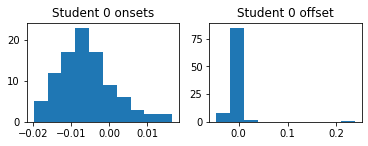

Onset Grade =  100.0 	 Duration Grade =  100.0
Onset ABS  Mean: 0.007854,Onset Mean: -0.005868, Dev. from 0: 0.009316
Offset Mean: -0.003900, Dev. from 0: 0.026518
Articulation Grade =  100.0 Sound Control Grade =  100.0
Final Mark =  100.0
F-measure =  0.955
////////////////////////////
Student 1 offset


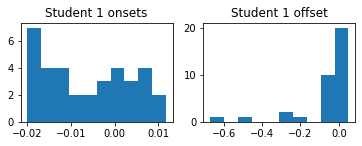

Onset Grade =  72.0 	 Duration Grade =  79.2
Onset ABS  Mean: 0.009811,Onset Mean: -0.005871, Dev. from 0: 0.011569
Offset Mean: -0.062909, Dev. from 0: 0.159243
Articulation Grade =  79.2 Sound Control Grade =  79.2
Final Mark =  79.2
F-measure =  0.341
////////////////////////////
Student 2 offset


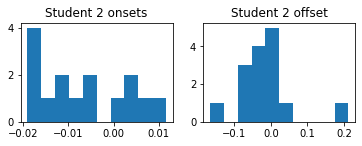

Onset Grade =  79.2 	 Duration Grade =  90.0
Onset ABS  Mean: 0.010175,Onset Mean: -0.006892, Dev. from 0: 0.011899
Offset Mean: -0.014031, Dev. from 0: 0.078121
Articulation Grade =  79.2 Sound Control Grade =  79.2
Final Mark =  79.2
F-measure =  0.148
////////////////////////////
Student 3 offset


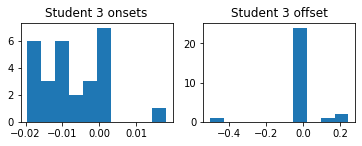

Onset Grade =  79.2 	 Duration Grade =  79.2
Onset ABS  Mean: 0.009338,Onset Mean: -0.007263, Dev. from 0: 0.011423
Offset Mean: -0.012072, Dev. from 0: 0.118731
Articulation Grade =  90.0 Sound Control Grade =  79.2
Final Mark =  79.2
F-measure =  0.287
////////////////////////////
Student 4 offset


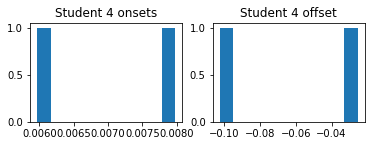

Onset Grade =  56.7 	 Duration Grade =  56.7
Onset ABS  Mean: 0.006973,Onset Mean: 0.006973, Dev. from 0: 0.007045
Offset Mean: -0.063855, Dev. from 0: 0.074612
Articulation Grade =  72.0 Sound Control Grade =  72.0
Final Mark =  72.0
F-measure =  0.019
////////////////////////////
Student 5 offset


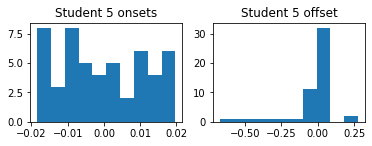

Onset Grade =  72.0 	 Duration Grade =  79.2
Onset ABS  Mean: 0.010198,Onset Mean: -0.000381, Dev. from 0: 0.011702
Offset Mean: -0.034918, Dev. from 0: 0.159365
Articulation Grade =  79.2 Sound Control Grade =  79.2
Final Mark =  79.2
F-measure =  0.518
////////////////////////////
Student 6 offset


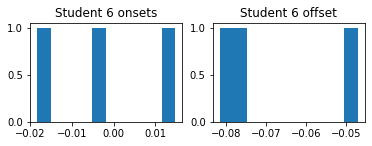

Onset Grade =  72.0 	 Duration Grade =  79.2
Onset ABS  Mean: 0.012230,Onset Mean: -0.002343, Dev. from 0: 0.013802
Offset Mean: -0.068303, Dev. from 0: 0.069989
Articulation Grade =  79.2 Sound Control Grade =  79.2
Final Mark =  79.2
F-measure =  0.029
////////////////////////////
Student 7 offset


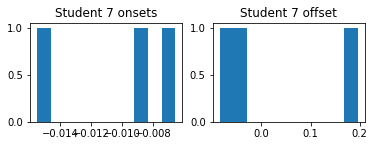

Onset Grade =  79.2 	 Duration Grade =  79.2
Onset ABS  Mean: 0.010367,Onset Mean: -0.010367, Dev. from 0: 0.011021
Offset Mean: 0.022007, Dev. from 0: 0.126530
Articulation Grade =  79.2 Sound Control Grade =  90.0
Final Mark =  79.2
F-measure =  0.03
////////////////////////////


In [75]:
onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [48]:
df_all

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,TF 2 Mark,Sound Quality Mark,finalMark
0,0,0.960,0.950,0.955,0.008,-0.006,0.009,0.008,-0.006,0.009,100.0,100.0,100.0,100.0,100.0,5.00
1,1,0.337,0.347,0.341,0.010,-0.006,0.012,0.072,-0.065,0.162,72.0,79.2,79.2,79.2,79.2,3.15
2,2,0.147,0.149,0.148,0.010,-0.007,0.012,0.052,-0.014,0.078,79.2,90.0,79.2,79.2,79.2,3.60
3,3,0.298,0.277,0.287,0.009,-0.007,0.011,0.056,-0.012,0.119,79.2,79.2,90.0,79.2,79.2,3.60
4,4,0.019,0.020,0.019,0.007,0.007,0.007,0.064,-0.064,0.075,56.7,56.7,72.0,72.0,72.0,2.25
5,5,0.531,0.505,0.518,0.010,-0.000,0.012,0.079,-0.038,0.166,72.0,79.2,79.2,79.2,79.2,3.60
6,6,0.029,0.030,0.029,0.012,-0.002,0.014,0.068,-0.068,0.070,72.0,79.2,79.2,79.2,79.2,3.60
7,7,0.029,0.030,0.030,0.010,-0.010,0.011,0.109,0.022,0.127,79.2,79.2,79.2,90.0,79.2,3.60
8,8,0.269,0.287,0.278,0.010,-0.008,0.012,0.044,-0.037,0.106,90.0,90.0,90.0,90.0,79.2,4.50


In [50]:
import pandas as pd
#sonset_deviations,soffset_deviations

In [51]:
data_timing_onset0= { 'onsets0' :sonset_deviations[0]}
df = pd.DataFrame(data_timing_onset0,columns=['onsets0'])
fig = px.histogram(df, x="onsets0")
fig.show()

In [52]:

data_timing_duration0= { 'durations0' :soffset_deviations[0]}
df = pd.DataFrame(data_timing_duration0,columns=['durations0'])
fig = px.histogram(df, x="durations0")
fig.show()

In [76]:
dataset = pd.read_csv('drive/MyDrive/Bass/data/road/StudentStatistics_road.csv') 
#dataset = pd.read_csv('drive/MyDrive/Bass/data/StudentStatisticsBillie.csv')
header = ["Student", "precision", "recall", "f_measure_value", "Onset ABS Mean", "Onset Mean", "Onset Std",
             "Duration ABS Mean", "Duration Mean", "Duration Std", "onsetMark", " DurationMark", " TF 1 Mark ",
             " TF 2 Mark ", "Sound Quality Mark", " finalMark"]

In [54]:
dataset

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,TF 2 Mark,Sound Quality Mark,finalMark
0,0,0.960,0.950,0.955,0.008,-0.006,0.009,0.008,-0.006,0.009,100.0,100.0,100.0,100.0,100.0,5.00
1,1,0.337,0.347,0.341,0.010,-0.006,0.012,0.072,-0.065,0.162,72.0,79.2,79.2,79.2,79.2,3.15
2,2,0.147,0.149,0.148,0.010,-0.007,0.012,0.052,-0.014,0.078,79.2,90.0,79.2,79.2,79.2,3.60
3,3,0.298,0.277,0.287,0.009,-0.007,0.011,0.056,-0.012,0.119,79.2,79.2,90.0,79.2,79.2,3.60
4,4,0.019,0.020,0.019,0.007,0.007,0.007,0.064,-0.064,0.075,56.7,56.7,72.0,72.0,72.0,2.25
5,5,0.531,0.505,0.518,0.010,-0.000,0.012,0.079,-0.038,0.166,72.0,79.2,79.2,79.2,79.2,3.60
6,6,0.029,0.030,0.029,0.012,-0.002,0.014,0.068,-0.068,0.070,72.0,79.2,79.2,79.2,79.2,3.60
7,7,0.029,0.030,0.030,0.010,-0.010,0.011,0.109,0.022,0.127,79.2,79.2,79.2,90.0,79.2,3.60
8,8,0.269,0.287,0.278,0.010,-0.008,0.012,0.044,-0.037,0.106,90.0,90.0,90.0,90.0,79.2,4.50


In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#X = dataset[['P', 'R', 'F',  ' ABS Mean Onset','Mean  Onset','Std Onset',' ABS Mean Duration','Mean Duration','Std Duration']]
#X = dataset[['precision', 'recall', 'f_measure_value',  'Onset ABS Mean','Onset Mean','Onset Std']]
#X = dataset[['precision','recall','f_measure_value']]#,'Onset Mean','Onset Std']]
X = dataset[['precision','recall','f_measure_value','Onset Mean']]#,]]
y=array(dataset['onsetMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(round(df,3))
print("Onset Grades")
print('Mean Absolute Error:', round(  metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error:',round( np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
# IEC PRF Mean Absolute Error: 12.079847760757067
# IEC PRF Root Mean Squared Error: 12.521853181718802

      Actual  Predicted
0  79.199997     76.868
1  79.199997     79.540
2  72.000000     92.954
Onset Grades
Mean Absolute Error: 7.875
Root Mean Squared Error: 12.174


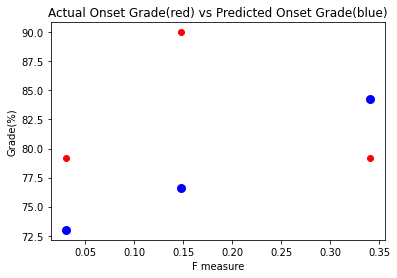

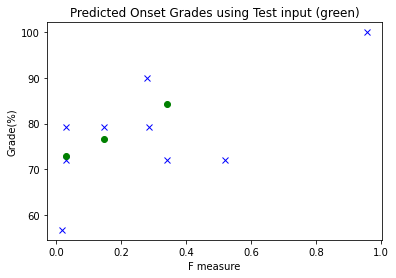

In [83]:
onset_grade_list = df_all["onsetMark"].tolist()   
onset_f_measure_value_list = df_all["f_measure_value"].tolist()   
plt.title('Actual Onset Grade(red) vs Predicted Onset Grade(blue)')
plt.xlabel('F measure')
plt.ylabel('Grade(%)')
plt.scatter(X_test["f_measure_value"].tolist(), y_test,  color='red')
plt.scatter(X_test["f_measure_value"].tolist(), y_pred, color='blue', linewidth=3)
plt.show()

plt.title('Predicted Onset Grades using Test input (green)')
plt.xlabel('F measure')
plt.ylabel('Grade(%)')
plt.plot(onset_f_measure_value_list,onset_grade_list, 'x',color='blue')
plt.plot(X_test["f_measure_value"].tolist(),y_pred, 'o', color='green')
plt.show()

In [88]:
X = dataset[['precision','recall','f_measure_value','Duration ABS Mean']]
y=array(dataset[' DurationMark'])
#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(round(df,3))
print("Duration Grade")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))





      Actual  Predicted
0  79.199997     76.521
1  90.000000     81.158
2  79.199997     70.737
Duration Grade
Mean Absolute Error: 6.661
Root Mean Squared Error: 7.234


[79.2 90.  79.2]
[76.52063305 81.15815677 70.7370331 ]


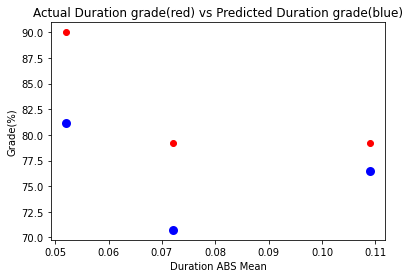

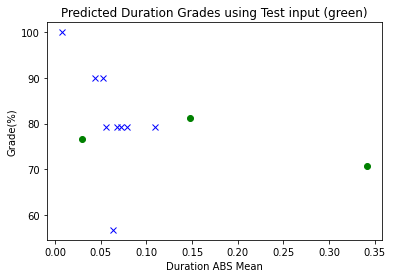

In [86]:
duration_amean_list = df_all["Duration ABS Mean"].tolist()   
duration_grade_list = df_all[" DurationMark"].tolist()   
   
plt.title('Actual Duration grade(red) vs Predicted Duration grade(blue)')
plt.xlabel('Duration ABS Mean')
plt.ylabel('Grade(%)')
plt.scatter(X_test["Duration ABS Mean"].tolist(), y_test,  color='red')
plt.scatter(X_test["Duration ABS Mean"].tolist(), y_pred, color='blue', linewidth=3)
print(y_test)
print(y_pred)
plt.show()

plt.title('Predicted Duration Grades using Test input (green)')
plt.xlabel('Duration ABS Mean')
plt.ylabel('Grade(%)')
plt.plot(duration_amean_list,duration_grade_list, 'x',color='blue')
plt.plot(X_test["f_measure_value"].tolist(),y_pred, 'o', color='green')
plt.show()

In [59]:
X = dataset[['precision','recall','f_measure_value','Onset ABS Mean','Duration ABS Mean']]
y=array(dataset[' finalMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

   Actual  Predicted
0    3.60   4.084500
1    3.60   5.483432
2    3.15  -1.320617
Mean Absolute Error: 2.2795165506465547
Root Mean Squared Error: 2.814751489671162
